# **1.Cleaning the data**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data\\US_Regional_Sales_Data.csv')
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [19]:
df.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price'],
      dtype='object')

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [21]:
# Convert numerical columns to float (remove comma and convert)
numeric_cols = ["Unit Cost", "Unit Price"]
for col in numeric_cols:
    df[col] = df[col].str.replace(",", "").astype(float)

In [22]:
# Convert order quantity and discount to float
df["Order Quantity"] = df["Order Quantity"].astype(float)
df["Discount Applied"] = df["Discount Applied"].astype(float)

In [23]:
# Convert dates
date_cols = ["ProcuredDate", "OrderDate", "ShipDate", "DeliveryDate"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d/%m/%y', errors='coerce')

In [24]:
# Create Revenue feature
df['Revenue'] = df['Order Quantity'] * df['Unit Price'] * (1 - df['Discount Applied'])

In [25]:
# Extract time-based features
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')
df['OrderDayOfWeek'] = df['OrderDate'].dt.dayofweek
df['DaysToDeliver'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   float64       
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

In [27]:
print(df.isnull().sum())

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
Revenue             0
OrderMonth          0
OrderDayOfWeek      0
DaysToDeliver       0
dtype: int64


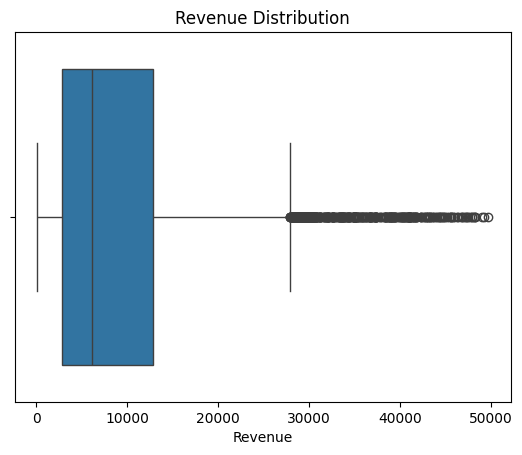

In [28]:
sns.boxplot(x=df['Revenue'])
plt.title("Revenue Distribution")
plt.show()

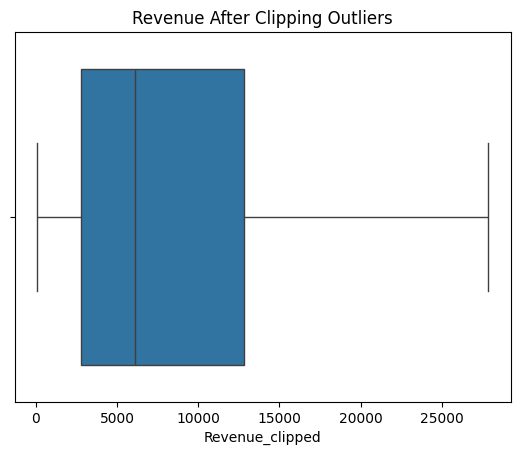

In [29]:
# IQR Method
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cliping outlier values instead of removing
df['Revenue_clipped'] = df['Revenue'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(x=df['Revenue_clipped'])
plt.title("Revenue After Clipping Outliers")
plt.show()

In [30]:
df.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'Revenue', 'OrderMonth',
       'OrderDayOfWeek', 'DaysToDeliver', 'Revenue_clipped'],
      dtype='object')

In [31]:
# Saving cleaned data before encoding
df.to_csv("Data\\cleaned_sales_data_no_encoding.csv", index=False)

In [32]:
# One-hot encoding
categorical_features = ['Sales Channel', 'WarehouseCode', '_StoreID', '_ProductID']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Keeping only relevant columns for modeling
final_columns = [
    'OrderDate', 'OrderMonth', 'Order Quantity', 'Discount Applied',
    'Unit Cost', 'Unit Price', 'Revenue_clipped', 'OrderDayOfWeek', 'DaysToDeliver'
] + [col for col in df_encoded.columns if col.startswith(tuple(categorical_features))]

df_model = df_encoded[final_columns]

# Saving cleaned data after encoding
df_model.to_csv("Data\\cleaned_sales_data.csv", index=False)

# **2.Visualization**

In [33]:
file_path = 'Data\\cleaned_sales_data.csv'

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
df = pd.read_csv(file_path)

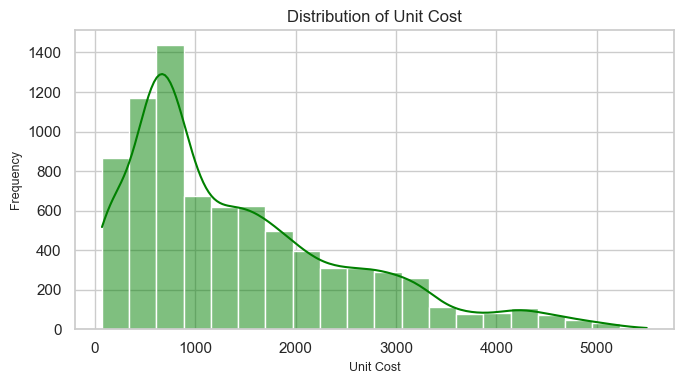

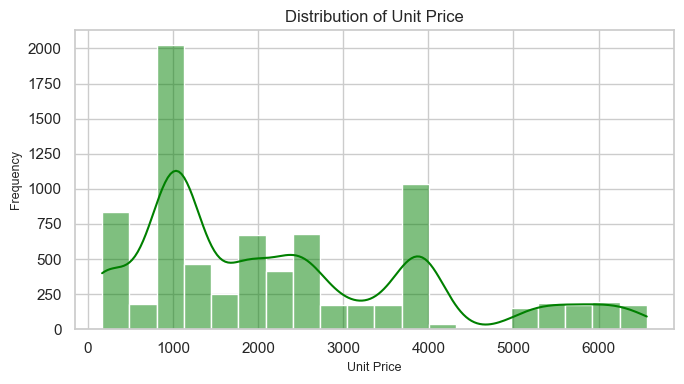

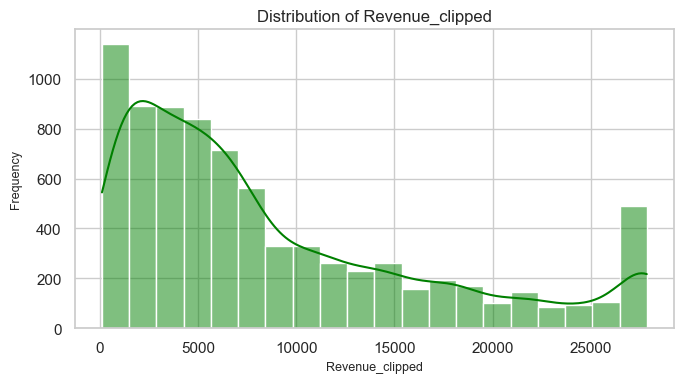

In [35]:
df = pd.read_csv(file_path)

if 'OrderDate' in df.columns and df['OrderDate'].dtype == 'object':
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])

numerical_cols = ['Unit Cost', 'Unit Price', 'Revenue_clipped']

sns.set_style("whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=20, kde=True, color='green')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col, fontsize=9)
    plt.ylabel("Frequency", fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

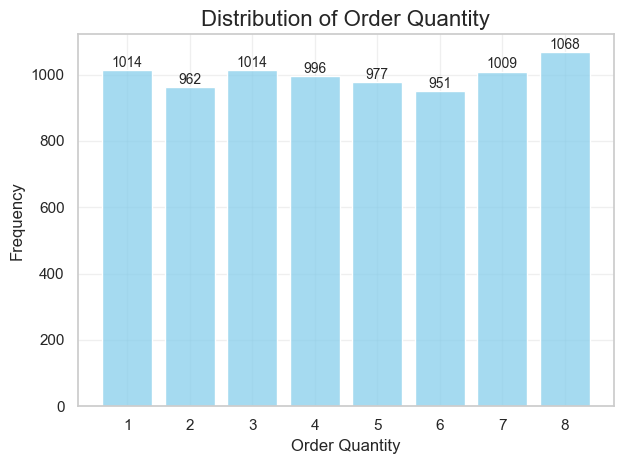

In [36]:
ax = sns.histplot(df['Order Quantity'], discrete=True, shrink=0.8, color='skyblue')

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title("Distribution of Order Quantity", fontsize=16)
plt.xlabel("Order Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

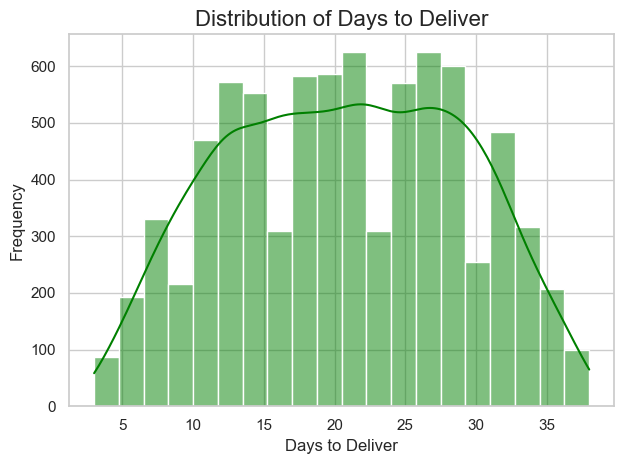

In [37]:
sns.histplot(df['DaysToDeliver'], bins=20, kde=True, color='green')
plt.title("Distribution of Days to Deliver", fontsize=16)
plt.xlabel("Days to Deliver", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\3797073177.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=daily_revenue, x='OrderDayName', y='Revenue_clipped', palette=custom_colors)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\3797073177.py:15: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=daily_revenue, x='OrderDayName', y='Revenue_clipped', palette=custom_colors)


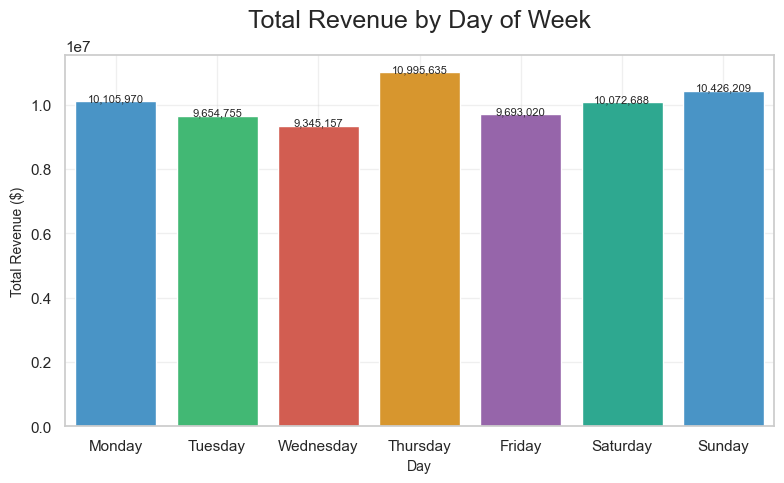

In [38]:
# --- Days of the Week Analysis ---


# Map day numbers to names
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['OrderDayName'] = df['OrderDayOfWeek'].apply(lambda x: days[x])

custom_colors = ["#3498db", "#2ecc71", "#e74c3c", "#f39c12", "#9b59b6", "#1abc9c"]

# Group by day of week
daily_revenue = df.groupby('OrderDayName')['Revenue_clipped'].sum().reindex(days).reset_index()

# Ploting the barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=daily_revenue, x='OrderDayName', y='Revenue_clipped', palette=custom_colors)

# Add value labels on top of bars
for i, v in enumerate(daily_revenue['Revenue_clipped']):
    ax.text(i, v + 0.1, f'{v:,.0f}', ha='center', fontsize=8)

plt.title('Total Revenue by Day of Week', fontsize=18, pad=20)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Total Revenue ($)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

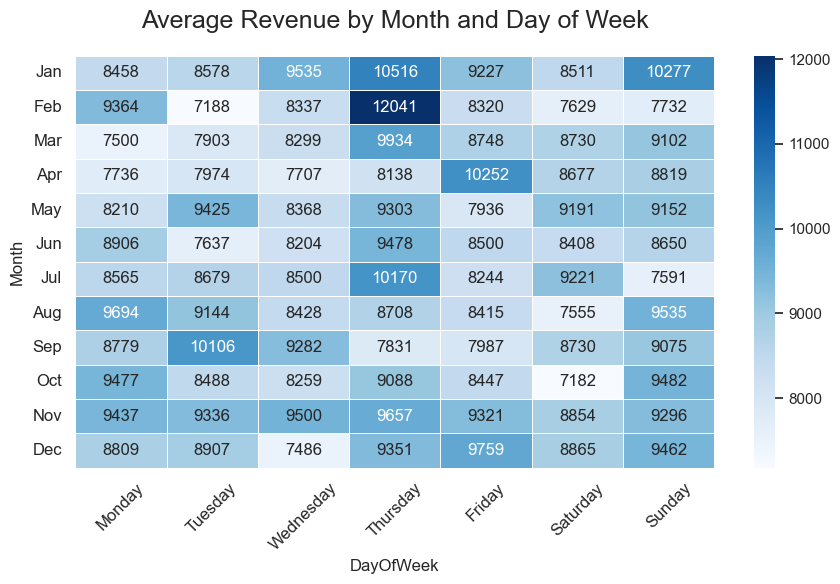

In [39]:
# --- Seasonality Analysis ---

# Extracting month and day of week
df['Month'] = df['OrderDate'].dt.month
df['DayOfWeek'] = df['OrderDate'].dt.dayofweek

# Creating heatmap of revenue by month and day of week
monthly_dow_revenue = df.groupby(['Month', 'DayOfWeek'])['Revenue_clipped'].mean().unstack()

plt.figure(figsize=(9, 6))
ax = sns.heatmap(monthly_dow_revenue, cmap="Blues", annot=True, fmt='.0f', linewidths=.5)

# Seting labels
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting heatmap
plt.yticks(np.arange(0.5, len(months) + 0.5), months, rotation=0, fontsize=12)
plt.xticks(np.arange(0.5, len(days) + 0.5), days, rotation=45, fontsize=12)
plt.title('Average Revenue by Month and Day of Week', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

In [40]:
if 'Sales Channel' not in df.columns:
    df['Sales Channel'] = df.apply(lambda row: 'In-Store' if row['Sales Channel_In-Store'] else 'Online', axis=1)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\3249297381.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


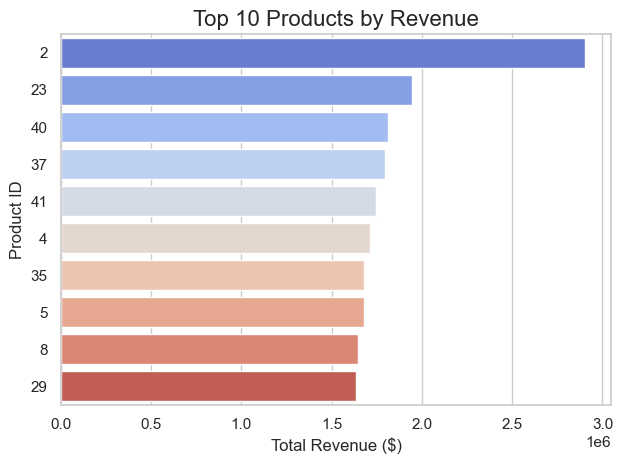

In [41]:
#Identifing product columns
product_cols = [col for col in df.columns if col.startswith('_ProductID_')]

#For each row, geting the product id where the value is True
df['ProductID'] = df[product_cols].idxmax(axis=1)

#Cleaning the ProductID (removeing the prefix "_ProductID_")
df['ProductID'] = df['ProductID'].str.replace('_ProductID_', '')

#Grouping by ProductID
top_products = df.groupby('ProductID')['Revenue_clipped'].sum().sort_values(ascending=False).head(10)

# Plotting barplot
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Total Revenue ($)", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.tight_layout()
plt.show()

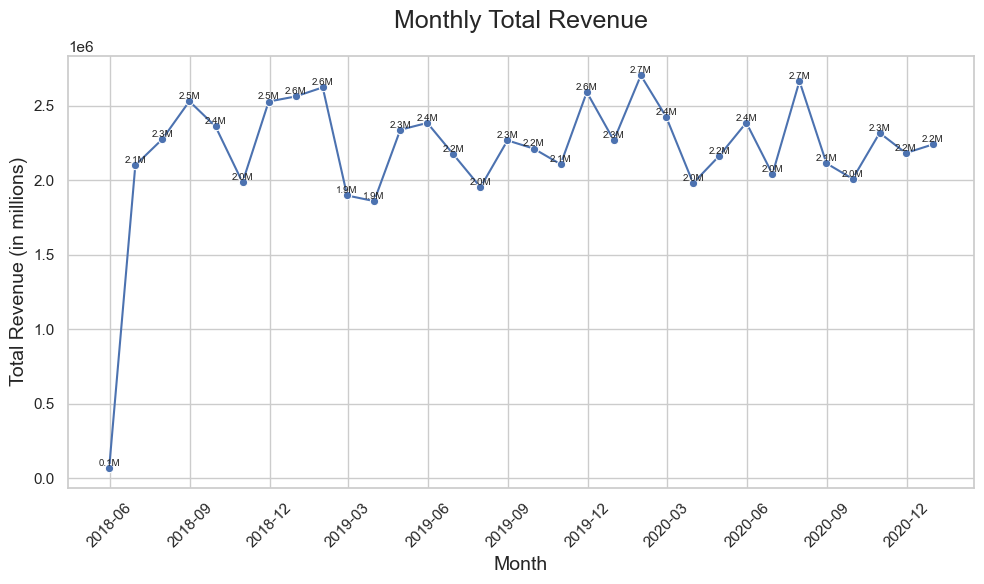

In [42]:
import matplotlib.dates as mdates

df = pd.read_csv(file_path, parse_dates=["OrderDate"])


# --- Time Series Analysis: Revenue Over Time ---

# Aggregating revenue by month
df_monthly = df.set_index("OrderDate")["Revenue_clipped"].resample("ME").sum().reset_index()

# Creating the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly, x="OrderDate", y="Revenue_clipped", marker="o")

# Annotating each point with its value
for i in range(len(df_monthly)):
    # Rounding the value to no decimal places and converting to millions
    revenue_value = round(df_monthly["Revenue_clipped"].iloc[i] / 1e6, 1)

    # Reducing font size and shifting text position to prevent overlap
    plt.text(df_monthly["OrderDate"].iloc[i], df_monthly["Revenue_clipped"].iloc[i] + 1000,
             f'{revenue_value:,.1f}M',
             horizontalalignment='center', verticalalignment='bottom', fontsize=7)

# Formating the plot
plt.title("Monthly Total Revenue", fontsize=18, pad=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue (in millions)", fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show ticks every 3 months
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\4281414352.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=channel_df, x='Channel', y='Revenue', palette=custom_colors)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\4281414352.py:33: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.barplot(data=channel_df, x='Channel', y='Revenue', palette=custom_colors)


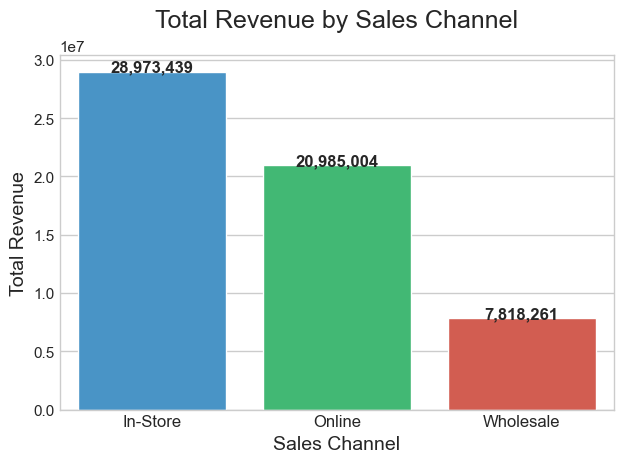

In [43]:
from matplotlib.colors import LinearSegmentedColormap

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
custom_colors = ["#3498db", "#2ecc71", "#e74c3c", "#f39c12", "#9b59b6", "#1abc9c"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
sns.set_palette(custom_colors)

df = pd.read_csv(file_path, parse_dates=["OrderDate"])





# --- Sales Channel Analysis ---

# Extracting sales channel columns
sales_channel_cols = [col for col in df.columns if col.startswith('Sales Channel_')]

# Calculating total revenue by sales channel
channel_revenue = {}
for channel in sales_channel_cols:
    channel_name = channel.replace('Sales Channel_', '')
    channel_revenue[channel_name] = df[df[channel] == True]['Revenue_clipped'].sum()

# Creating DataFrame for plotting
channel_df = pd.DataFrame({
    'Channel': list(channel_revenue.keys()),
    'Revenue': list(channel_revenue.values())
}).sort_values('Revenue', ascending=False)

# Creating bar plot
ax = sns.barplot(data=channel_df, x='Channel', y='Revenue', palette=custom_colors)

# Adding value labels on top of bars
for i, v in enumerate(channel_df['Revenue']):
    ax.text(i, v + 0.1, f'{v:,.0f}', ha='center', fontweight='bold')

# Plotting barplot
plt.title('Total Revenue by Sales Channel', fontsize=18, pad=20)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\1921949577.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=quantity_revenue, x='Order Quantity', y='Revenue_clipped', palette=custom_colors)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_34728\1921949577.py:6: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=quantity_revenue, x='Order Quantity', y='Revenue_clipped', palette=custom_colors)


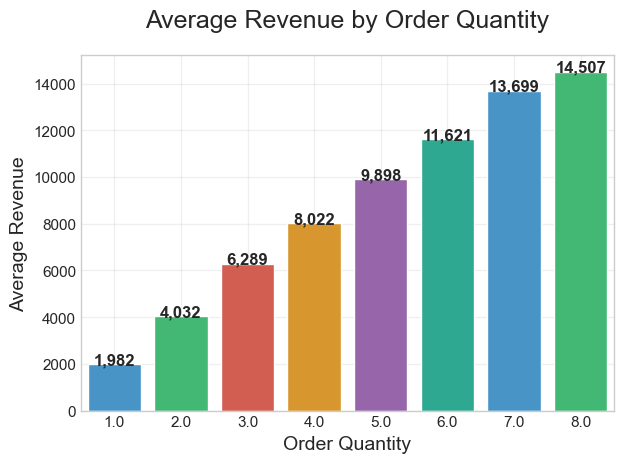

In [44]:
# --- Order Quantity Analysis ---

# Grouping by order quantity and calculate average revenue
quantity_revenue = df.groupby('Order Quantity')['Revenue_clipped'].mean().reset_index()

ax = sns.barplot(data=quantity_revenue, x='Order Quantity', y='Revenue_clipped', palette=custom_colors)

# Adding value labels on top of bars
for i, v in enumerate(quantity_revenue['Revenue_clipped']):
    ax.text(i, v + 0.1, f'{v:,.0f}', ha='center', fontweight='bold')

# Ploting barplot
plt.title('Average Revenue by Order Quantity', fontsize=18, pad=20)
plt.xlabel('Order Quantity', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

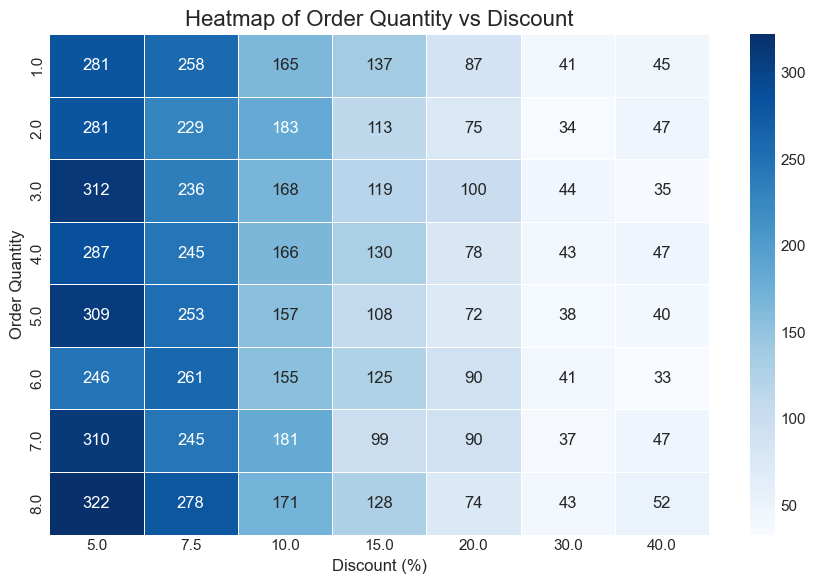

In [45]:
# --- Quantity vs Discount Analysis ---

plt.figure(figsize=(9, 6))

# Converting discount to %
df['Discount Applied (%)'] = df['Discount Applied'] * 100

# Creating pivot table
pivot_table = df.pivot_table(index='Order Quantity', columns='Discount Applied (%)', aggfunc='size', fill_value=0)

# Ploting heatmap
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Heatmap of Order Quantity vs Discount", fontsize=16)
plt.xlabel("Discount (%)", fontsize=12)
plt.ylabel("Order Quantity", fontsize=12)
plt.tight_layout()
plt.show()

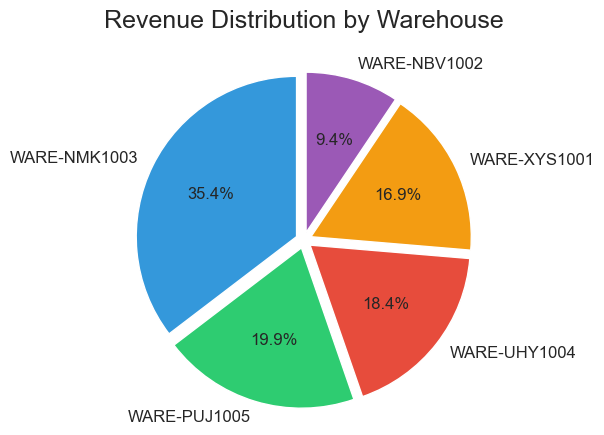

In [46]:
# --- Warehouse Analysis ---

# Extracting warehouse columns
warehouse_cols = [col for col in df.columns if col.startswith('WarehouseCode_')]

# Calculating total revenue by warehouse
warehouse_revenue = {}
for warehouse in warehouse_cols:
    warehouse_name = warehouse.replace('WarehouseCode_', '')
    warehouse_revenue[warehouse_name] = df[df[warehouse] == True]['Revenue_clipped'].sum()

# Creating DataFrame for plotting
warehouse_df = pd.DataFrame({
    'Warehouse': list(warehouse_revenue.keys()),
    'Revenue': list(warehouse_revenue.values())
}).sort_values('Revenue', ascending=False)

# Ploting pie chart
plt.pie(warehouse_df['Revenue'], labels=warehouse_df['Warehouse'], autopct='%1.1f%%',
        startangle=90, shadow=False, explode=[0.05] * len(warehouse_df),
        colors=custom_colors, textprops={'fontsize': 12})

plt.title('Revenue Distribution by Warehouse', fontsize=18, pad=20)
plt.axis('equal')
plt.show()